## Power spectral density

The one sided periodogram estimate $S_x(f)$ of the ${\it power}$ spectral density (PSD) is defined in terms of the Fourier transform of a finite sample of data
as
$$
S_x[k] \equiv 2\times\frac{1}{T}\left|\hat{x}[k]\right|^2\ .
$$
The division by $T$ is what turns an "energy" into a "power"; it also implies that the estimate at a given frequency will be independent on $T$.
The factor $2$ takes into account that we use only positive frequencies.

Note that the dimensions of the PSD:
$$
[ S_x[k] ] = [ dt^2 / T ] = \frac{1}{Hz}
$$

In [1]:
### importing the library
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.fftpack import fft

#### Let's simulate a noise time series

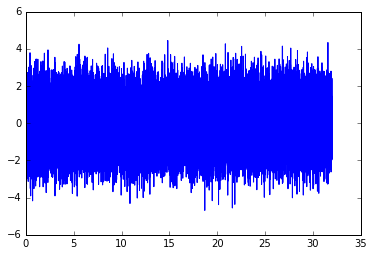

In [2]:

sampling=1024
nsample = 32768
dt = 1.0 / sampling
T = nsample * dt
 
x = np.linspace(0.0, nsample*dt,nsample)
nu=50.0# frequency in Hz of the sine function
sigma = 1.0
y = np.sin(nu * 2.0*np.pi*x) +sigma * np.random.normal(size=nsample)

fig, ax = plt.subplots()
ax.plot(x, y, label="Data")



#### ...and perform its Fourier Transform

In [3]:
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*dt), nsample/2) 
 

The simple Power Spectral Density (One Sided, since we are considering only the positive Frequencies)
is 

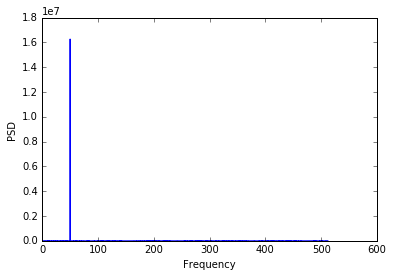

In [4]:
# Let's check the (one sided) periodogram
oneSidedPeriodogram = 2/T*abs(yf[0:nsample/2])**2
plt.plot(xf,oneSidedPeriodogram)
plt.xlabel('Frequency')
plt.ylabel('PSD')

### Using standard scipy library with its module signal

We obtain the same results, apart the normalization factor for the amplitude

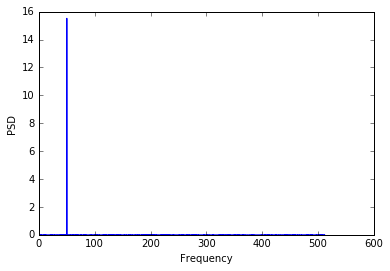

In [5]:
 
from scipy import signal

freqs, P_xx = signal.periodogram(y, sampling, scaling = 'density')
plt.plot(freqs, P_xx)
plt.xlabel('Frequency')
plt.ylabel('PSD') 

So, in the plot we can clearly identify a Frequncy (the $50$ Hz) on a random noise. If in some way we can listen to these data, we will clearly hear a whistle at that frequency. What happen if we have a more featured surroinding noise?

** Let's simulate data using the model we introduced in our first post of these series, which was based on ARMA serie**

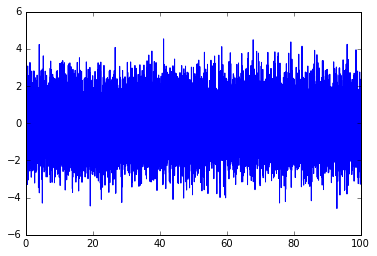

In [6]:
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(12345)

arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
arparams = np.r_[1, -arparams]
maparam = np.r_[1, maparams]
## simulate a simple sinusoidal function
x = np.linspace(0, 100, nsample)
y = arma_generate_sample(arparams, maparams, nsample)
fig, ax = plt.subplots()
ax.plot(x, y, label="Data") 

### Now, how does look like its PSD?

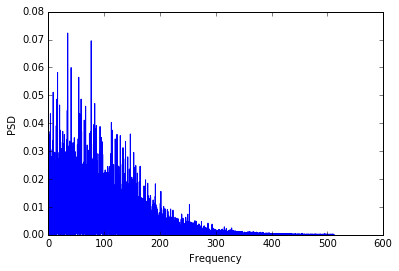

In [7]:
 
freqs, P_xx = signal.periodogram(y, sampling, scaling = 'density')
plt.plot(freqs, P_xx)
plt.xlabel('Frequency')
plt.ylabel('PSD') 

We cannot recognize a single dominant contribution to a given frequency, but we found a forest of lines.
Each of these lines identify the intensity of the signal at the corresponding frequency

If we plot the data in a semilogaritmic plot, we can see better what we call a **broad band** noise. That is a noise where the **spectrum** of frequency contributing to it is very wide

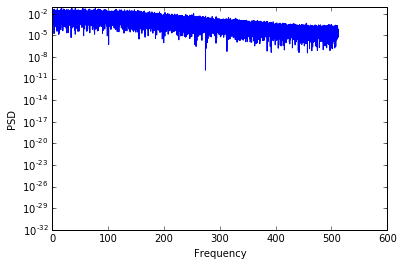

In [8]:
plt.semilogy(freqs, P_xx)
plt.xlabel('Frequency')
plt.ylabel('PSD') 